In [1]:
from models.prediction import PredModel
from data import get_loader

from tqdm import tqdm
import torch

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
from models.prediction import PredModel
# model = PredModel(2, 3, 20, batch_size=1, hidden_dim=900)
fil = '/Users/ishaan/code/descript-research-test/model.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga.pt'
# fil = '/Users/ishaan/code/descript-research-test/beluga/128_0.0001_adam.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/128_0.001_Adam_weird_sig.pt'
# fil = '/Users/ishaan/code/descript-research-test/beluga/128_0.001_Adam_weird_sig_shuffle.pt'

fil = '/Users/ishaan/code/descript-research-test/beluga/overfit.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/overfit_300.pt'
# fil = '/Users/ishaan/code/descript-research-test/beluga/overfit_3.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/64_0.0001_1615667362.633599.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/1_overfit.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/64_0.0001_1_400.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/const.pt'
fil = '/Users/ishaan/code/descript-research-test/beluga/64_0.0001_1615692736.471937.pt'
# fil = '/Users/ishaan/code/descript-research-test/beluga/64_0.0001_Adam_weird_sig_shuffle.pt'
model = PredModel(2, 3, 20, batch_size=1, hidden_dim=400)
model = PredModel(2, 1, 20, batch_size=1, hidden_dim=900)
state = torch.load(open(fil, "rb"), map_location=torch.device("cpu"))["model"]
model.load_state_dict(state)


<All keys matched successfully>

In [3]:
sys.path.insert(0,'..')
from utils import plot_stroke
loader, dataset = get_loader("data/strokes-py3.npy", 128)


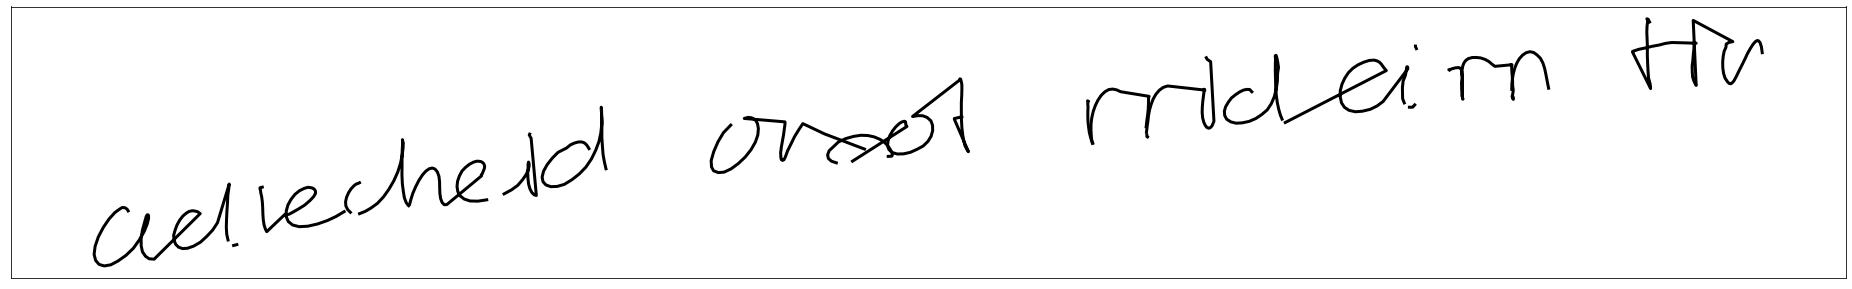

In [83]:
model.eval()
x = model.generate(torch.device("cpu"))
x = torch.cat(x, axis=0)
inv = torch.from_numpy(dataset.norm.inverse_transform(x[:, 1:]))
x = torch.cat([x[:, 0:1], inv], axis=1)
x[-1, 0]= 1
plot_stroke(x.numpy())

In [68]:
x

tensor([[ 0.0000, -0.1476, -0.5334],
        [ 0.0000, -0.1070, -0.8389],
        [ 0.0000, -0.0401, -1.2689],
        ...,
        [ 0.0000,  0.5743,  0.4684],
        [ 0.0000,  0.3385,  0.1723],
        [ 0.0000,  0.0811,  0.0079]])

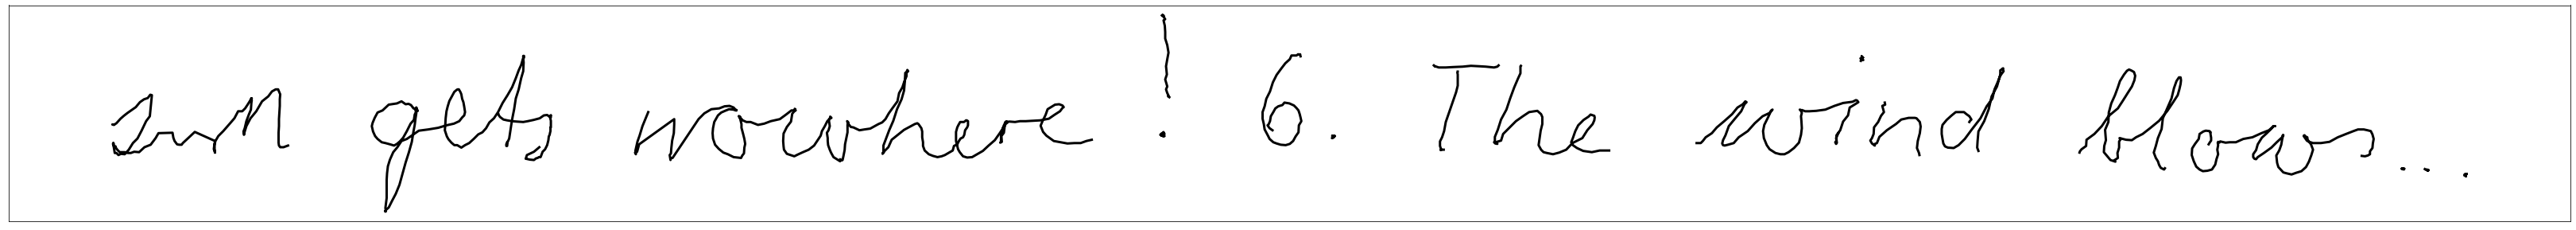

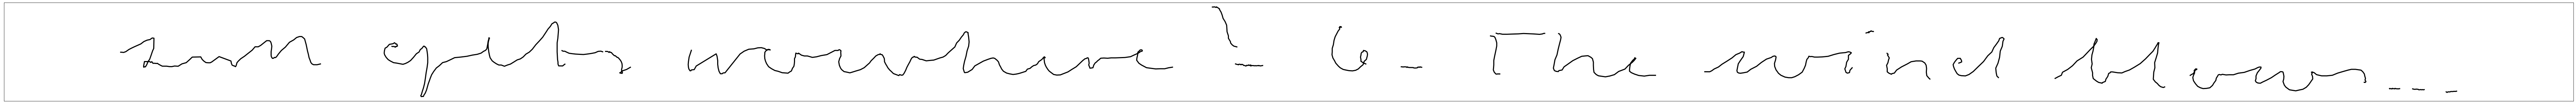

In [14]:
a = dataset[0]
plot_stroke(a)
# print(a)
inv = torch.from_numpy(dataset.norm.inverse_transform(a[:, 1:]))
a = torch.cat([a[:, 0:1], inv], axis=1)
plot_stroke(a)

In [ ]:
# mask = y[..., 0] > 0.3
# y[mask] = 1
# y[torch.logical_not(mask)] = 0
plot_stroke(y.numpy())


In [19]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [35]:
count_parameters(model)

3998401

In [ ]:
from models.prediction import PredModel
model = PredModel(2, 3, 20, batch_size=1)

In [2]:
from data import StrokeDataset
dataset = StrokeDataset("data/strokes-py2.npy")


In [ ]:
dataset[0]

In [ ]:
a = dataset[0]
plot_stroke(a.numpy())

In [3]:
dataset

In [4]:
a = dataset.data

In [10]:
sum([1 for x in a if x[0, 0] == 0])

5833

In [13]:
import numpy as np
np.concatenate([s[:, 1:] for s in dataset.data]).mean(0)

array([ 0.41256168, -0.00600292], dtype=float32)

In [12]:
dataset[0]

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.1500,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.2500,  0.0000],
        [ 0.0000,  0.0000,  0.0500],
        [ 1.0000,  0.2000, -0.1000]])